In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
tn_rice_df = pd.read_csv('../data/tamilnadu_rice_2000_2017.csv')
tn_rice_df.head()


,Dist Code,Year,State Code,State Name,Dist Name,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
0,83,2000,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,225920.0,3385.27,84.63175,40.62324,74.47594,19120004.96,9.177602e+06,1.682560e+07,25,80,6.5,1200,2.0,18
1,83,2001,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,229580.0,3487.02,87.17550,41.84424,76.71444,20013751.29,9.606601e+06,1.761210e+07,25,80,6.5,1200,2.0,18
2,83,2002,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,185180.0,3011.18,75.27950,36.13416,66.24596,13940257.81,6.691324e+06,1.226743e+07,25,80,6.5,1200,2.0,18
3,83,2003,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,172060.0,2854.70,71.36750,34.25640,62.80340,12279492.05,5.894156e+06,1.080595e+07,25,80,6.5,1200,2.0,18
4,83,2004,11,Tamil Nadu,Chengalpattu MGR / Kanchipuram,rice,168400.0,3010.69,75.26725,36.12828,66.23518,12675004.90,6.084002e+06,1.115400e+07,25,80,6.5,1200,2.0,18


In [3]:
yearly_fert_df = tn_rice_df.groupby('Year').agg({
    'Yield_kg_per_ha': 'mean',
    'N_req_kg_per_ha': 'mean',
    'P_req_kg_per_ha': 'mean',
    'K_req_kg_per_ha': 'mean',
    'Total_N_kg': 'sum'
}).reset_index()

yearly_fert_df.head()


,Year,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg
0,2000,3753.235000,93.830875,45.03882,82.571170,1.841580e+08
1,2001,3496.983333,87.424583,41.96380,76.933633,1.645907e+08
2,2002,2836.750000,70.918750,34.04100,62.408500,8.942806e+07
3,2003,2690.109167,67.252729,32.28131,59.182402,8.056972e+07
4,2004,3077.548333,76.938708,36.93058,67.706063,1.265411e+08


In [4]:
tn_rice_df.shape


(216, 20)

In [5]:
correlation = yearly_fert_df['N_req_kg_per_ha'].corr(yearly_fert_df['Yield_kg_per_ha'])

print("Correlation between Nitrogen and Yield:", correlation)


Correlation between Nitrogen and Yield: 1.0


In [6]:
correlation_total = yearly_fert_df['Total_N_kg'].corr(yearly_fert_df['Yield_kg_per_ha'])

print("Correlation between Total Nitrogen Applied and Yield:", correlation_total)


Correlation between Total Nitrogen Applied and Yield: 0.8859475292998022


In [7]:
avg_n = yearly_fert_df['Total_N_kg'].mean()
avg_yield = yearly_fert_df['Yield_kg_per_ha'].mean()

overuse_years = yearly_fert_df[
    (yearly_fert_df['Total_N_kg'] > avg_n) &
    (yearly_fert_df['Yield_kg_per_ha'] < avg_yield)
]

overuse_years


,Year,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg
1,2001,3496.983333,87.424583,41.96380,76.933633,1.645907e+08
6,2006,3526.800833,88.170021,42.32161,77.589618,1.652653e+08


In [8]:
yearly_fert_df['Nitrogen_Efficiency'] = (
    yearly_fert_df['Yield_kg_per_ha'] / yearly_fert_df['Total_N_kg']
)

yearly_fert_df[['Year', 'Nitrogen_Efficiency']]


,Year,Nitrogen_Efficiency
0,2000,0.000020
1,2001,0.000021
2,2002,0.000032
3,2003,0.000033
4,2004,0.000024
5,2005,0.000022
6,2006,0.000021
7,2007,0.000025
8,2008,0.000025
9,2009,0.000024


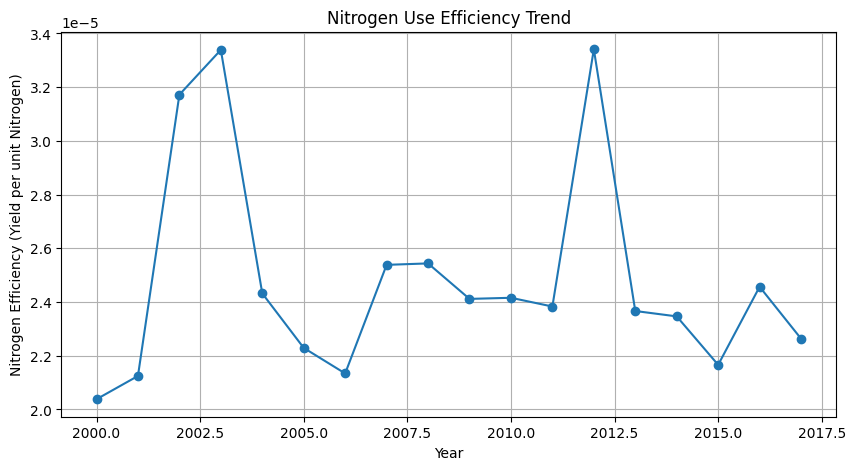

In [9]:
plt.figure(figsize=(10,5))
plt.plot(yearly_fert_df['Year'], yearly_fert_df['Nitrogen_Efficiency'], marker='o')
plt.xlabel('Year')
plt.ylabel('Nitrogen Efficiency (Yield per unit Nitrogen)')
plt.title('Nitrogen Use Efficiency Trend')
plt.grid(True)
plt.show()
